### *COMP-3705 (241553) Unsupervised Machine Learning - Fall 2023*
### *Assignment 6: t-SNE*
### *Due on Nov 29, 2023 11:59 PM*
### *By: Elizer Lising*

## *Problem Statement*
### *Continuing with your work on a team developing a mobile app for hand calculations in Arabic (begun on assignment 5), perform a clustering analysis to determine how well you can expect a classification model to work on this data. The app will require a neural network to classify hand-drawn digits in order to correctly complete the calculations. Using clustering, we can determine whether there is separation between the different classes and see where a classification model may struggle to differentiate between classes. Using a dataset of hand drawn Arabic digits where each image corresponds to a point in a 784-dimensional space, you are to complete a clustering analysis and visualize the results in a two-dimensional plot*

In [63]:
### Import the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial import distance

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from collections import Counter

In [96]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)

## *1. Data*

In [64]:
# importing files
url_file ='https://raw.githubusercontent.com/ElizerLising/UML/main/csvImages%2010k%20x%20784.csv'

In [65]:
# Load csv from url
data = pd.read_csv(url_file).values

In [66]:
### showing the number of rows and columns in the dataset.
### visualize the number of dimensions
print(data.shape)

(9999, 784)


### *(9999, 784) = 9,999 images and 784 columns*

#### *Normalize by dividing each value by 255. In order to display the images, reshape the array so each image is 28 x 28 using numpy.ndarray.reshape. Use matplotlib.plot.imshow and matplotlib.plot.subplot to give a plot of the first five images using the 'gray' colour map. In order to put the data back in the original shape for input to the neural network, reshape each image to be 784 (one-dimensional).*

In [67]:
# Normalize
X_train_normalized = data / 255.0

In [68]:
# Reshape each image to be 28 x 28
X_train_reshaped = X_train_normalized.reshape(-1, 28, 28)

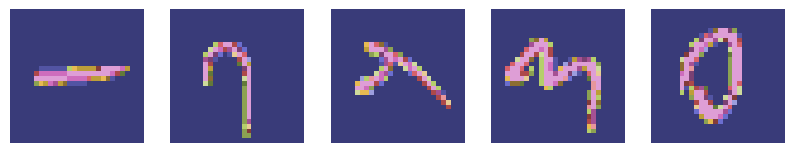

In [69]:
### Visualize the plot
import matplotlib.pyplot as plt
    
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_reshaped[i], cmap='tab20b')
    plt.axis('off')
plt.show()

In [70]:
X_train_normalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
# Reshape to be 784 one dimensional
X_train_flattened = X_train_normalized.reshape(-1, 784)

In [72]:
# double check shape
X_train_flattened.shape

(9999, 784)

## *2. Clustering*
### *Use sklearn.decomposition.PCA.fit_transform to do a PCA transformation with n_components = 40. This reduces the dimension of each image to a size that is more manageable, while keeping the most important aspects of the data.*
### *Create at least 8 different clustering models using k-means, (agglomerative and divisive) hierarchical, and DBSCAN clustering; experiment with different choices of hyperparameters. Calculate the silhouette score for each model and tabulate the results.*
### *Select the best model for the use case and justify your choice in markdown.*

### *PCA*

In [73]:
### number of PCA components
n_components = 40

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_flattened)

print("X_train shape after PCA transformation:", X_train_pca.shape)

X_train shape after PCA transformation: (9999, 40)


In [74]:
### number of clusters
clusters = 20
square_distance = []
for i in range(1,clusters):
    KM_model = KMeans(i, init='k-means++', n_init=15, max_iter=400)
    KM_model.fit(X_train_pca)
    square_distance.append(KM_model.inertia_)

square_distance

[354576.61033617164,
 309493.7575178937,
 285189.34997678676,
 266413.4431129305,
 248730.71498229253,
 237189.93704990685,
 228706.97470362502,
 221437.69330691412,
 214942.76799050602,
 208874.9526998431,
 203238.00317420962,
 198168.67872175633,
 193703.980403696,
 189948.39867113516,
 186355.25255725376,
 182937.74654998255,
 180506.92676304042,
 177513.6453918898,
 174394.5425014905]

In [75]:
X = X_train_pca

### *K-Means*

In [76]:
#KMEANS

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

n_clusters = [2, 3, 4]

kmeans_data = pd.DataFrame(columns=['Number_of_Clusters', 'Silhouette_Score'])

for n_clusters_value in n_clusters:
    kmeans_labels = KMeans(n_clusters=n_clusters_value, random_state=42).fit_predict(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca, kmeans_labels)

    kmeans_data = kmeans_data.append({'Number_of_Clusters': n_clusters_value, 'Silhouette_Score': silhouette_avg}, ignore_index=True)

print(kmeans_data)


   Number_of_Clusters  Silhouette_Score
0                 2.0          0.298552
1                 3.0          0.133897
2                 4.0          0.090303


### *Agglomerative Clustering*

In [77]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import itertools  # Add this import statement

# Set options for the number of clusters
n_clusters_values = [3, 5, 8, 10]

# Set the 2 distance metrics
metrics = ['euclidean', 'manhattan']

# Set all the linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

# Create a new DataFrame to store the results
results_agglo = pd.DataFrame(columns=['n_clusters', 'metric', 'linkage', 'Silhouette Score'])

# Loop through different hyperparameters and calculate silhouette scores
for model_num, (n_clusters, metric, linkage) in enumerate(
        itertools.product(n_clusters_values, metrics, linkage_methods)):
    if linkage == 'ward' and metric != 'euclidean':
        continue

    # Create and fit the Agglomerative Clustering model
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity=metric, linkage=linkage)
    cluster_labels = model.fit_predict(X)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Store the results in the DataFrame
    results_agglo.loc[model_num] = [n_clusters, metric, linkage, silhouette_avg]

print(results_agglo)


   n_clusters     metric   linkage  Silhouette Score
0           3  euclidean      ward          0.190777
1           3  euclidean  complete          0.233432
2           3  euclidean   average          0.260350
3           3  euclidean    single          0.214060
5           3  manhattan  complete          0.028318
6           3  manhattan   average          0.231414
7           3  manhattan    single          0.214060
8           5  euclidean      ward          0.071041
9           5  euclidean  complete          0.196600
10          5  euclidean   average          0.156389
11          5  euclidean    single          0.094314
13          5  manhattan  complete          0.057397
14          5  manhattan   average          0.157781
15          5  manhattan    single          0.153623
16          8  euclidean      ward          0.096395
17          8  euclidean  complete          0.096522
18          8  euclidean   average          0.118612
19          8  euclidean    single          0.

### *Divisive Clustering*

In [78]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
import pandas as pd

# Create the hyperparameter choices
threshold_values = [3.0, 5.0]
linkage_criteria = ['ward', 'single', 'complete', 'average']
depth_values = [2, 3, 10]

# Create new DataFrame to store the results
results_fcluster = pd.DataFrame(columns=['Threshold (t)', 'Linkage Criterion', 'Depth', 'Silhouette Score'])

max_models = 10
model_num = 0

for t, criterion, depth in itertools.product(threshold_values, linkage_criteria, depth_values):
    # Create hierarchical clustering linkage matrix
    Z_hierarchy = linkage(X, method=criterion)

    # Perform divisive clustering using fcluster
    cluster_labels_fcluster = fcluster(Z_hierarchy, t, criterion='distance', depth=depth)

    # Check for two clusters
    unique_labels = np.unique(cluster_labels_fcluster)
    if len(unique_labels) >= 2:
        # Calculate the silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels_fcluster)

        # Store the results in the DataFrame
        results_fcluster.loc[model_num] = [t, criterion, depth, silhouette_avg]
        model_num += 1

        if model_num >= max_models:
            break

print(results_fcluster)


   Threshold (t) Linkage Criterion Depth  Silhouette Score
0            3.0              ward     2          0.124718
1            3.0              ward     3          0.124718
2            3.0              ward    10          0.124718
3            3.0            single     2         -0.358725
4            3.0            single     3         -0.358725
5            3.0            single    10         -0.358725
6            3.0          complete     2          0.114624
7            3.0          complete     3          0.114624
8            3.0          complete    10          0.114624
9            3.0           average     2          0.103094


### *DBSCAN*

In [84]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import itertools

# Create a list of  hyperparameters
epsilon_values = [ 0.1, 1.0 , 5.0]
min_samples_values = [3, 5, 10]
metrics = ['euclidean', 'manhattan']
p_values = [1, 2]

results_data = pd.DataFrame(columns=['Epsilon', 'Min_Samples', 'Metric', 'P', 'Silhouette Score'])

max_models = 30

model_count = 0

for eps in epsilon_values:
    for min_samples in min_samples_values:
        for metric in metrics:
            for p in p_values:
              if model_count >= max_models:
                break

              dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, p=p)
              dbscan_labels = dbscan.fit_predict(X_train_pca)
              # silhouette score
              if len(set(dbscan_labels)) > 1:
                  silhouette_avg = silhouette_score(X_train_pca, dbscan_labels)
              else:
                  silhouette_avg = -1

              # append results to a data
              results_data = results_data.append({
                  'Epsilon': eps,
                  'Min_Samples': min_samples,
                  'Metric': metric,
                  'P': p,
                  'Silhouette Score': silhouette_avg
              }, ignore_index=True)
              model_count += 1
# Display the results_fcluster 
print(results_data)

    Epsilon Min_Samples     Metric  P  Silhouette Score
0       0.1           3  euclidean  1         -0.156598
1       0.1           3  euclidean  2         -0.156598
2       0.1           3  manhattan  1         -1.000000
3       0.1           3  manhattan  2         -1.000000
4       0.1           5  euclidean  1         -1.000000
5       0.1           5  euclidean  2         -1.000000
6       0.1           5  manhattan  1         -1.000000
7       0.1           5  manhattan  2         -1.000000
8       0.1          10  euclidean  1         -1.000000
9       0.1          10  euclidean  2         -1.000000
10      0.1          10  manhattan  1         -1.000000
11      0.1          10  manhattan  2         -1.000000
12      1.0           3  euclidean  1         -0.243062
13      1.0           3  euclidean  2         -0.243062
14      1.0           3  manhattan  1         -0.156881
15      1.0           3  manhattan  2         -0.156881
16      1.0           5  euclidean  1         -0

In [89]:
# kmeans_data
best_kmeans_n_clusters = kmeans_data.loc[kmeans_data['Silhouette_Score'].idxmax()]
highest_silhouette_score_kmeans, best_n_clusters_kmeans = best_kmeans_n_clusters[['Silhouette_Score', 'Number_of_Clusters']]

# results_agglo
max_silhouette_row = results_agglo.loc[results_agglo['Silhouette Score'].idxmax()]
highest_silhouette_score, best_n_clusters, best_metric, best_linkage = max_silhouette_row[['Silhouette Score', 'n_clusters', 'metric', 'linkage']]

# results_fcluster
max_silhouette_row_fcluster = results_fcluster.loc[results_fcluster['Silhouette Score'].idxmax()]
highest_silhouette_score_fcluster, best_threshold, best_linkage_fcluster, best_depth_fcluster = max_silhouette_row_fcluster[['Silhouette Score', 'Threshold (t)', 'Linkage Criterion', 'Depth']]

# results_data
max_silhouette_row_df = results_data.loc[results_data['Silhouette Score'].idxmax()]
highest_silhouette_score_df, best_epsilon, best_min_samples, best_metric_df, best_p = max_silhouette_row_df[['Silhouette Score', 'Epsilon', 'Min_Samples', 'Metric', 'P']]


In [90]:
# Print kmeans_data results
print("KMeans Results:")
print(f"Highest Silhouette Score: {highest_silhouette_score_kmeans}")
print(f"Best Number of Clusters: {best_n_clusters_kmeans}")
print()

# Print results_agglo results
print("Agglomerative Clustering Results:")
print(f"Highest Silhouette Score: {highest_silhouette_score}")
print(f"Best Number of Clusters: {best_n_clusters}")
print(f"Best Metric: {best_metric}")
print(f"Best Linkage: {best_linkage}")
print()

# Print results_fcluster results
print("Divisive Clustering (fcluster) Results:")
print(f"Highest Silhouette Score: {highest_silhouette_score_fcluster}")
print(f"Best Threshold: {best_threshold}")
print(f"Best Linkage: {best_linkage_fcluster}")
print(f"Best Depth: {best_depth_fcluster}")
print()

# Print results_data (DBSCAN) results
print("DBSCAN Results:")
print(f"Highest Silhouette Score: {highest_silhouette_score_df}")
print(f"Best Epsilon: {best_epsilon}")
print(f"Best Min Samples: {best_min_samples}")
print(f"Best Metric: {best_metric_df}")
print(f"Best P: {best_p}")


KMeans Results:
Highest Silhouette Score: 0.298551905250391
Best Number of Clusters: 2.0

Agglomerative Clustering Results:
Highest Silhouette Score: 0.2603504543881777
Best Number of Clusters: 3
Best Metric: euclidean
Best Linkage: average

Divisive Clustering (fcluster) Results:
Highest Silhouette Score: 0.12471790326224917
Best Threshold: 3.0
Best Linkage: ward
Best Depth: 2

DBSCAN Results:
Highest Silhouette Score: 0.21764993564353793
Best Epsilon: 5.0
Best Min Samples: 5
Best Metric: euclidean
Best P: 1


## *3. t-SNE*
### *Use sklearn.manifold.TSNE to perform a dimensional reduction on the dataset using t-SNE with n_components = 2. Try at least 8 different ways of doing this by using different choices for perplexity, n_iter, and metric.*
### *Provide a scatter plot using the t-SNE components as coordinates and colour the points according to cluster membership. Print the Roman digit corresponding to each cluster at its centroid.*
### *Using markdown, explain which plot provides the best visualization. You may wish to revisit the clustering models in step 2 to improve your results.*

In [97]:
perplexity_values = [5, 10, 30]
n_iter_values = [250, 500]
metrics = ['euclidean']

# Store t-SNE models
tsne_results = pd.concat([
    pd.DataFrame({'Perplexity': perplexity, 'n_iter': n_iter, 'Metric': metric}, index=[0])
    for perplexity in perplexity_values
    for n_iter in n_iter_values
    for metric in metrics
], ignore_index=True)

print(tsne_results)


   Perplexity  n_iter     Metric
0           5     250  euclidean
1           5     500  euclidean
2          10     250  euclidean
3          10     500  euclidean
4          30     250  euclidean
5          30     500  euclidean


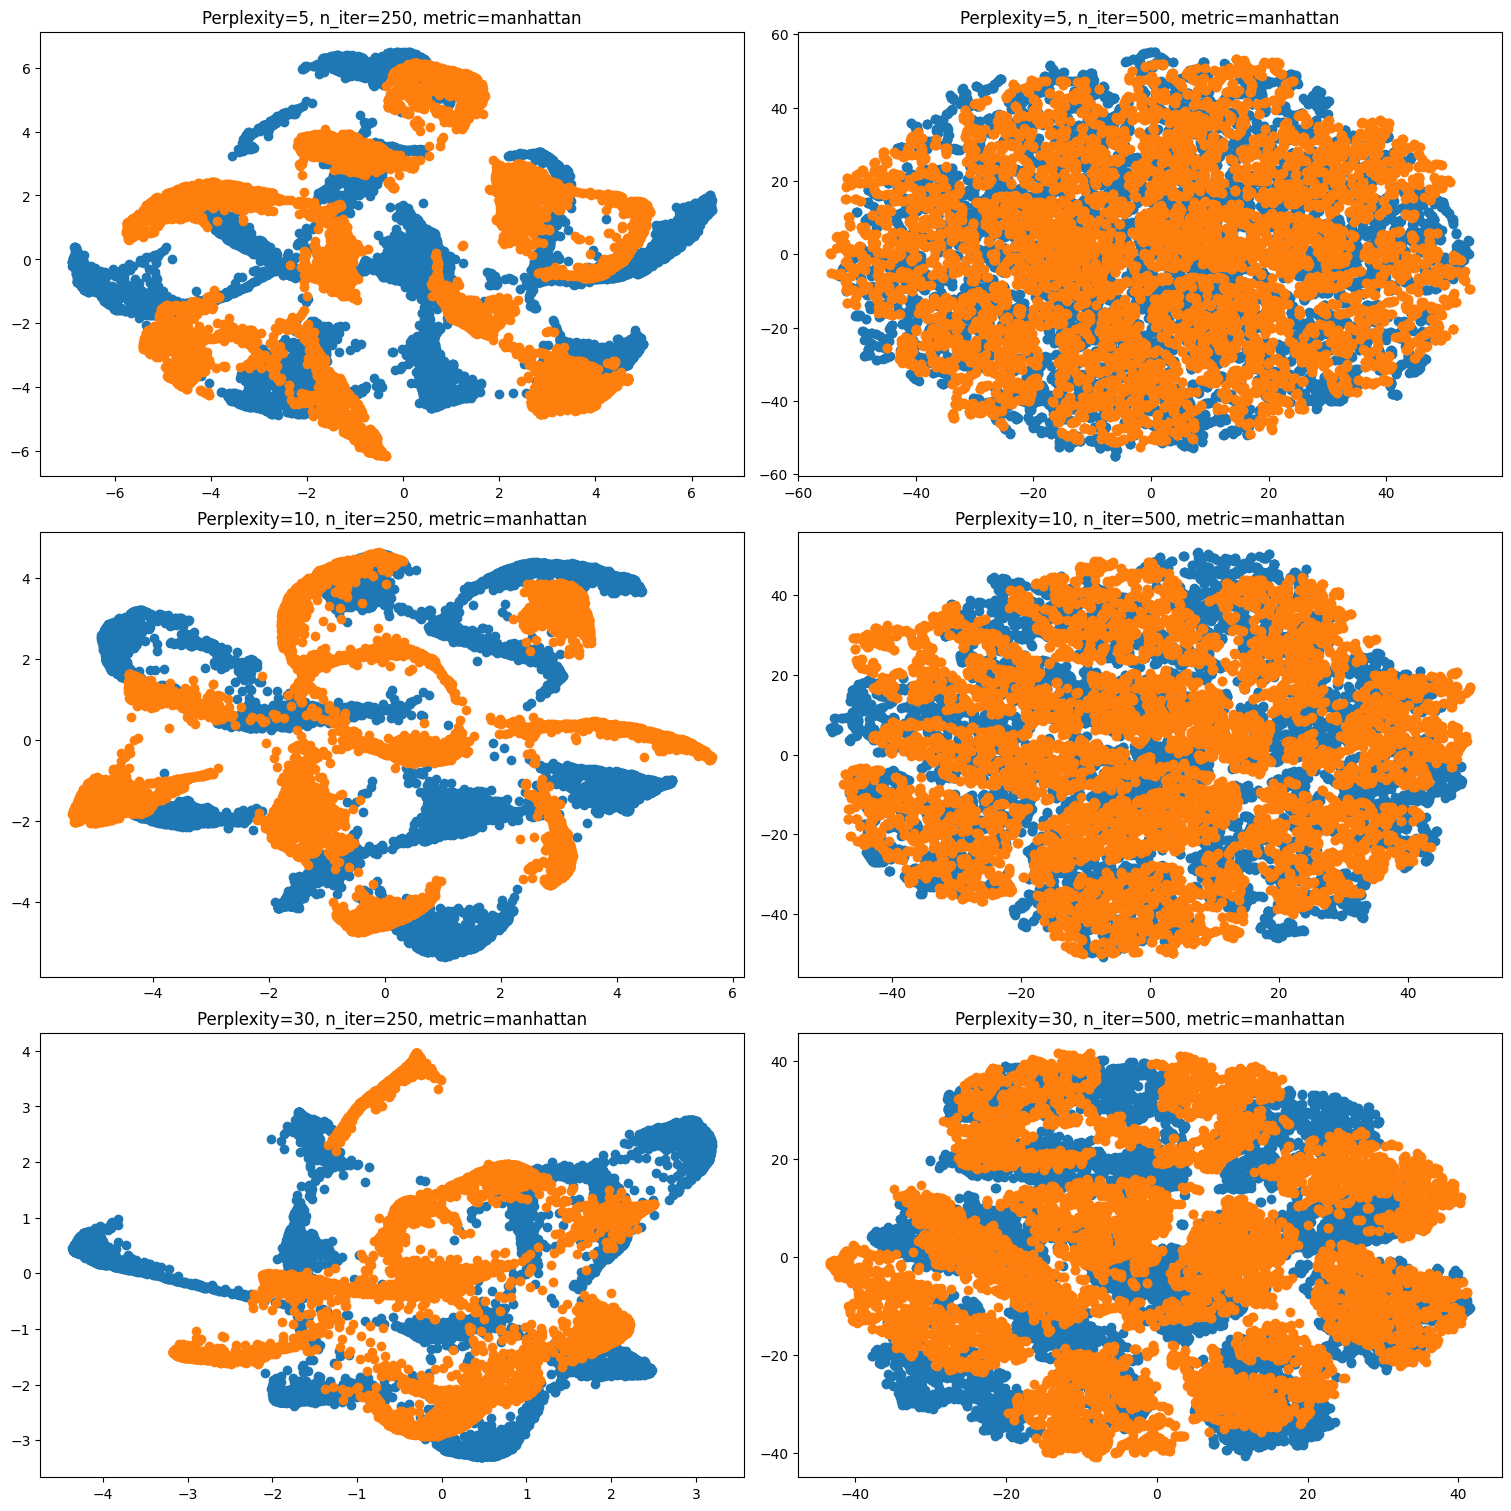

In [106]:
perplexity_values = [5, 10, 30]
n_iter_values = [250, 500]
metrics = ['euclidean', 'manhattan']

fig, axes = plt.subplots(len(perplexity_values), len(n_iter_values), figsize=(15, 15), constrained_layout=True)

for i, perplexity in enumerate(perplexity_values):
    for j, n_iter in enumerate(n_iter_values):
        for metric in metrics:
            # Create t-SNE model
            tsne_model = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, metric=metric)

            # Transform the data using t-SNE
            X_tsne = tsne_model.fit_transform(X)

            # Plot the t-SNE components
            axes[i, j].scatter(X_tsne[:, 0], X_tsne[:, 1], label=f'Perplexity={perplexity},\nn_iter={n_iter},\nmetric={metric}')
            axes[i, j].set_title(f'Perplexity={perplexity}, n_iter={n_iter}, metric={metric}')

plt.show()


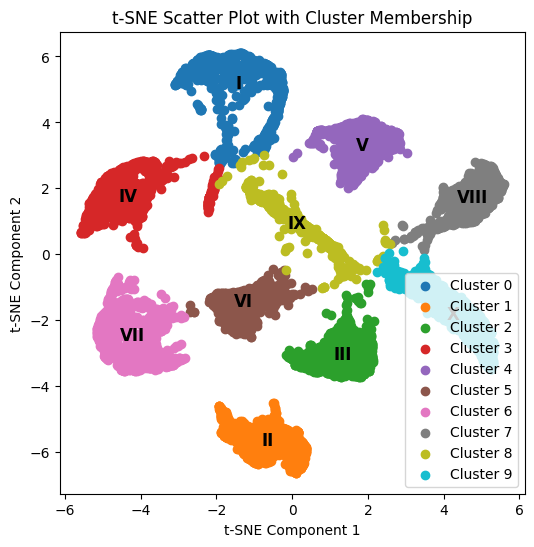

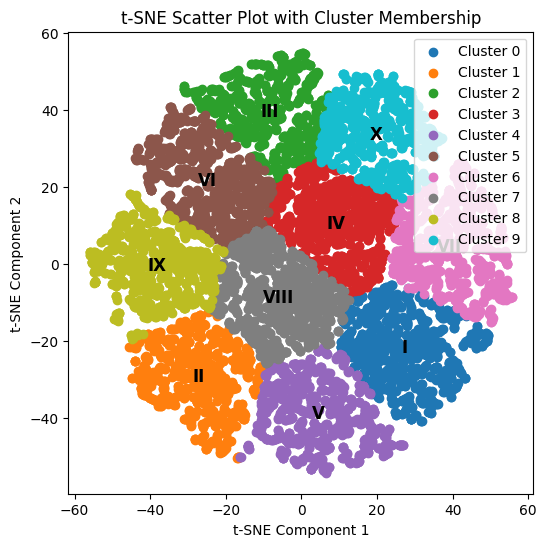

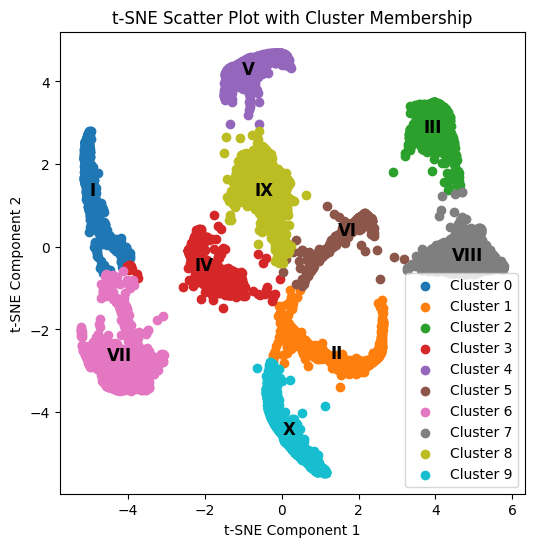

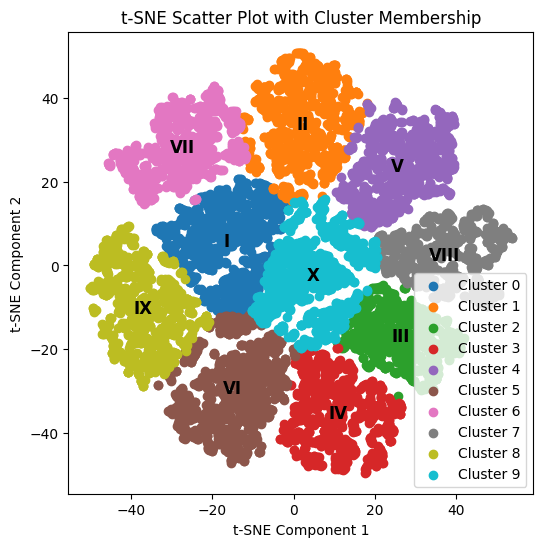

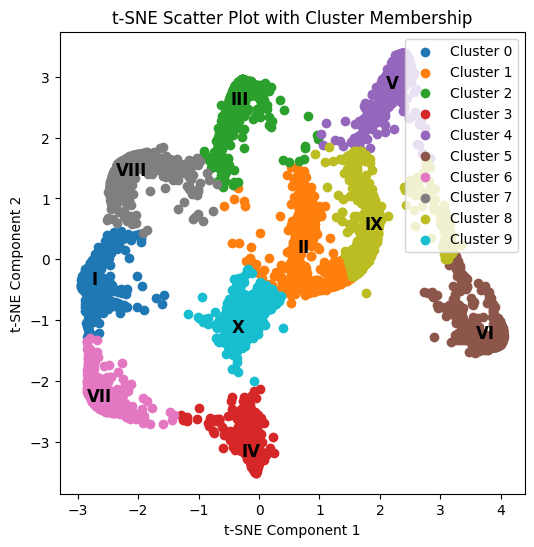

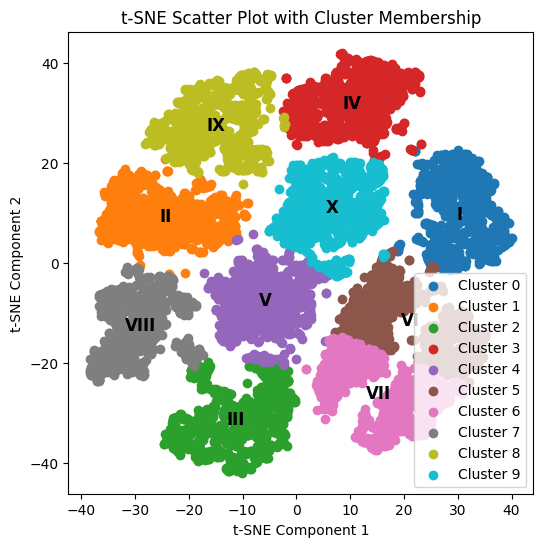

In [104]:
### 10 clusters
num_clusters = 10

for _, row in tsne_results.iterrows():
    perplexity, n_iter, metric = int(row['Perplexity']), int(row['n_iter']), row['Metric']

    tsne_model = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, metric=metric)

    # Fit and transform the data using t-SNE
    X_tsne = tsne_model.fit_transform(X)

    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans_model.fit_predict(X_tsne)

    # Scatter plot with different colors for each cluster
    plt.figure(figsize=(6, 6))
    for i in range(num_clusters):
        cluster_points = X_tsne[cluster_labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

    # Centroid roman digits
    centroids = np.array([np.mean(X_tsne[cluster_labels == i], axis=0) for i in range(num_clusters)])
    roman_digits = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X']

    for i, (x, y) in enumerate(centroids):
        plt.text(x, y, roman_digits[i], fontsize=12, fontweight='bold', ha='center', va='center', color='black')

    plt.title(f't-SNE Scatter Plot with Cluster Membership')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.show()


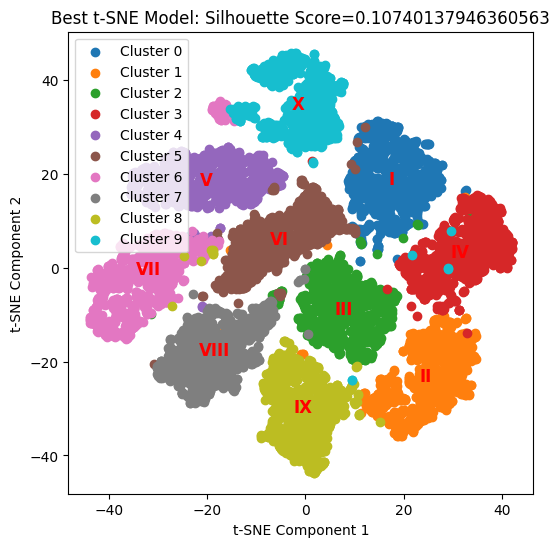

In [107]:
### Best 
from sklearn.metrics import silhouette_score

best_silhouette_score = -1
best_tsne_model = None
best_cluster_labels = None

num_clusters = 10

for _, row in tsne_results.iterrows():
    perplexity, n_iter, metric = int(row['Perplexity']), int(row['n_iter']), row['Metric']

    tsne_model = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, metric=metric)
    X_tsne = tsne_model.fit_transform(X)

    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans_model.fit_predict(X_tsne)

    silhouette_avg = silhouette_score(X, cluster_labels)

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_tsne_model = tsne_model
        best_cluster_labels = cluster_labels

# Visualize the best t-SNE model
plt.figure(figsize=(6, 6))
for i in range(num_clusters):
    cluster_points = X_tsne[best_cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

centroids = np.array([np.mean(X_tsne[best_cluster_labels == i], axis=0) for i in range(num_clusters)])
roman_digits = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X']

for i, (x, y) in enumerate(centroids):
    plt.text(x, y, roman_digits[i], fontsize=12, fontweight='bold', ha='center', va='center', color='red')

plt.title(f'Best t-SNE Model: Silhouette Score={best_silhouette_score}')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


## *Conclusion*
### *Seeking to identify the optimal t-SNE model based on the highest silhouette score. Silhouette scores measure the cohesion and separation of clusters, with higher scores indicating well-defined clusters. The code iterates through various t-SNE hyperparameter combinations, applying KMeans clustering to each.* 
### *The model above getting the highest silhouette score is considered the best model*
### *The resulting clustering is visualized, showcasing clear and distinct clusters. This approach aims to find a t-SNE configuration that optimally represents the underlying structure of the data, as reflected in the silhouette score, offering improved insights into cluster separations and overall data organization. The best model is chosen based on its ability to produce well-defined clusters.* 